In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Nvidia_stock_data.csv',sep=',')
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


In [3]:
print(df.dtypes)

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


In [4]:
print("Rozmiar danych:", df.shape)
print("Kolumny:", df.columns.values)
print("Braki w kolumnach:\n", df.isnull().sum())

Rozmiar danych: (6637, 6)
Kolumny: ['Date' 'Close' 'High' 'Low' 'Open' 'Volume']
Braki w kolumnach:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


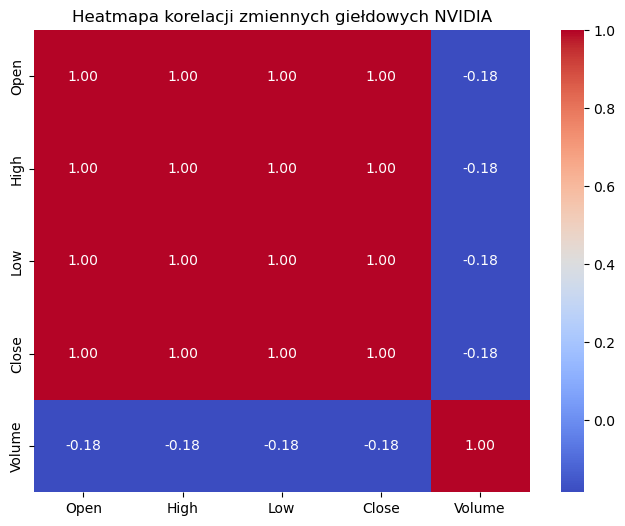

In [5]:
import seaborn as sns
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Obliczenie macierzy korelacji
corr = features.corr()

# Wykres
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmapa korelacji zmiennych giełdowych NVIDIA")
plt.show()

In [7]:
df['Close_next_day'] = df['Close'].shift(-1)
df = df.dropna()  # usunięcie ostatniego wiersza z NaN

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close_next_day']

In [9]:
df['Close_lag1'] = df['Close'].shift(1)
df['Volume_lag1'] = df['Volume'].shift(1)
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

In [10]:
df = df.dropna(subset=['MA_3', 'MA_5', 'MA_20'])

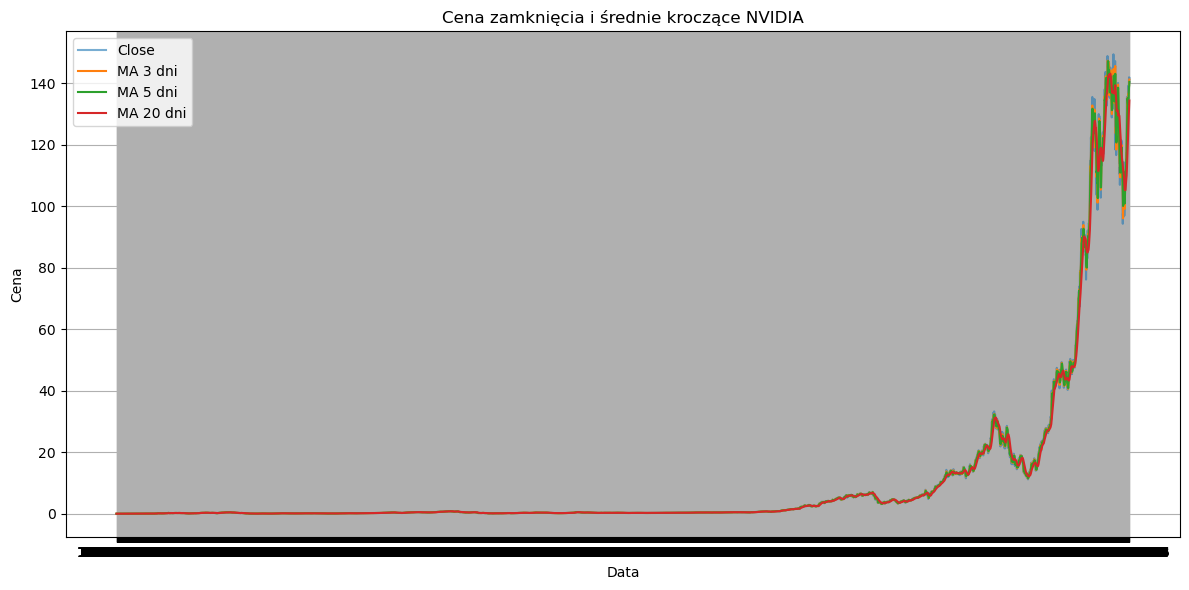

In [11]:

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.6)
plt.plot(df['Date'], df['MA_3'], label='MA 3 dni')
plt.plot(df['Date'], df['MA_5'], label='MA 5 dni')
plt.plot(df['Date'], df['MA_20'], label='MA 20 dni')
plt.legend()
plt.title('Cena zamknięcia i średnie kroczące NVIDIA')
plt.xlabel('Data')
plt.ylabel('Cena')
plt.grid(True)
plt.tight_layout()
plt.show()

,Date,Close,High,Low,Open,Volume,Close_next_day,Close_lag1,Volume_lag1,Rolling_3,MA_3,MA_5,MA_20
19,1999-02-19,0.039880,0.040597,0.037731,0.038209,75360000,0.040119,0.038566,70704000.0,0.038885,0.038805,0.039283,0.037564
20,1999-02-22,0.040119,0.041074,0.037969,0.040597,205248000,0.042029,0.039880,75360000.0,0.038805,0.039522,0.039331,0.037689
21,1999-02-23,0.042029,0.042865,0.038686,0.041074,138096000,0.045372,0.040119,205248000.0,0.039522,0.040676,0.039713,0.037713
22,1999-02-24,0.045372,0.050149,0.044298,0.048238,612768000,0.043940,0.042029,138096000.0,0.040676,0.042507,0.041193,0.038065
23,1999-02-25,0.043940,0.048716,0.043223,0.047283,149136000,0.041910,0.045372,612768000.0,0.042507,0.043780,0.042268,0.038352


In [13]:
df = df.dropna(subset=['MA_3', 'MA_5', 'MA_20', 'Close_lag1', 'Volume_lag1', 'Close_next_day'])

# Cecha wejściowa (X), cel (y)
X = df[['MA_3', 'MA_5', 'MA_20', 'Close_lag1', 'Volume_lag1']]
y = df['Close_next_day']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tworzenie i trening modelu
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R² score: {r2:.4f}")

Mean Squared Error (MSE): 1.455342
R² score: 0.9981


In [16]:
coefficients = pd.DataFrame({
    'Cecha': X.columns,
    'Współczynnik': model.coef_
})
print(coefficients)

         Cecha  Współczynnik
0         MA_3  2.055726e+00
1         MA_5 -7.534178e-01
2        MA_20  6.424420e-02
3   Close_lag1 -3.626939e-01
4  Volume_lag1  1.784239e-12


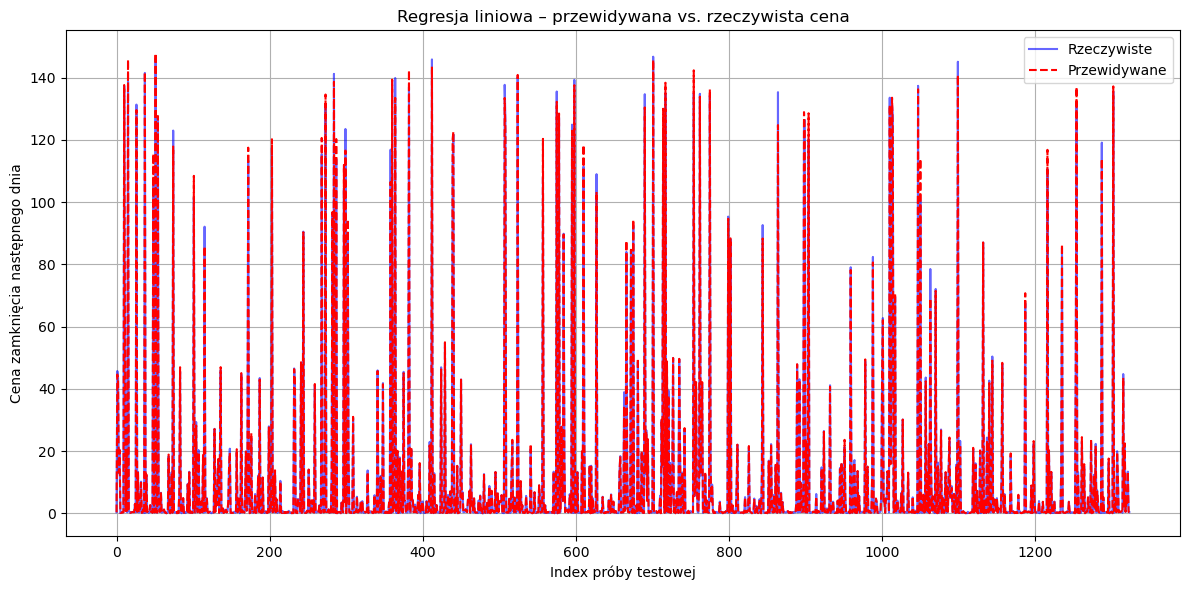

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Rzeczywiste', color='blue', alpha=0.6)
plt.plot(y_pred, label='Przewidywane', color='red', linestyle='--')
plt.title('Regresja liniowa – przewidywana vs. rzeczywista cena')
plt.xlabel('Index próby testowej')
plt.ylabel('Cena zamknięcia następnego dnia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Tworzymy przekształcenie do cech wielomianowych
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Ponowny podział danych
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [20]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# Predykcja
y_pred_poly = model_poly.predict(X_test_poly)

# Ocena
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Regression (2nd degree) MSE: {mse_poly:.6f}")
print(f"Polynomial Regression R² score: {r2_poly:.4f}")


Polynomial Regression (2nd degree) MSE: 19.538514
Polynomial Regression R² score: 0.9748


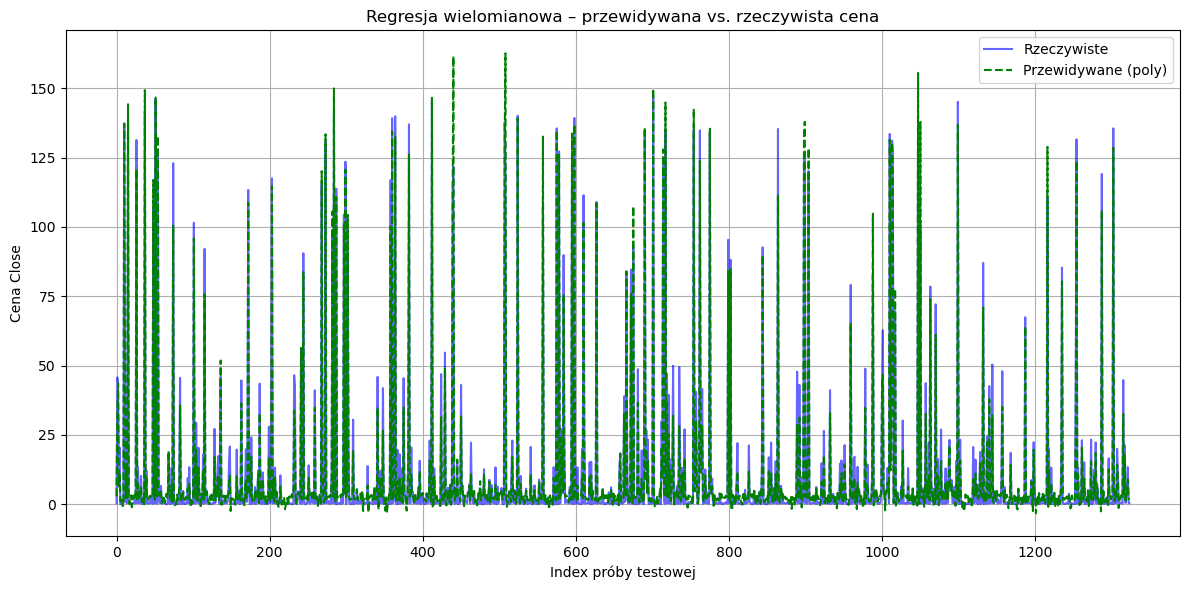

In [21]:
plt.figure(figsize=(12,6))
plt.plot(y_test_poly.values, label='Rzeczywiste', color='blue', alpha=0.6)
plt.plot(y_pred_poly, label='Przewidywane (poly)', color='green', linestyle='--')
plt.title('Regresja wielomianowa – przewidywana vs. rzeczywista cena')
plt.xlabel('Index próby testowej')
plt.ylabel('Cena Close')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Inicjalizacja modelu drzewa decyzyjnego
tree_model = DecisionTreeRegressor(random_state=42)

In [23]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
y_pred_tree = tree_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression MSE: {mse_tree:.6f}")
print(f"Decision Tree Regression R² score: {r2_tree:.4f}")

Decision Tree Regression MSE: 2.337126
Decision Tree Regression R² score: 0.9970


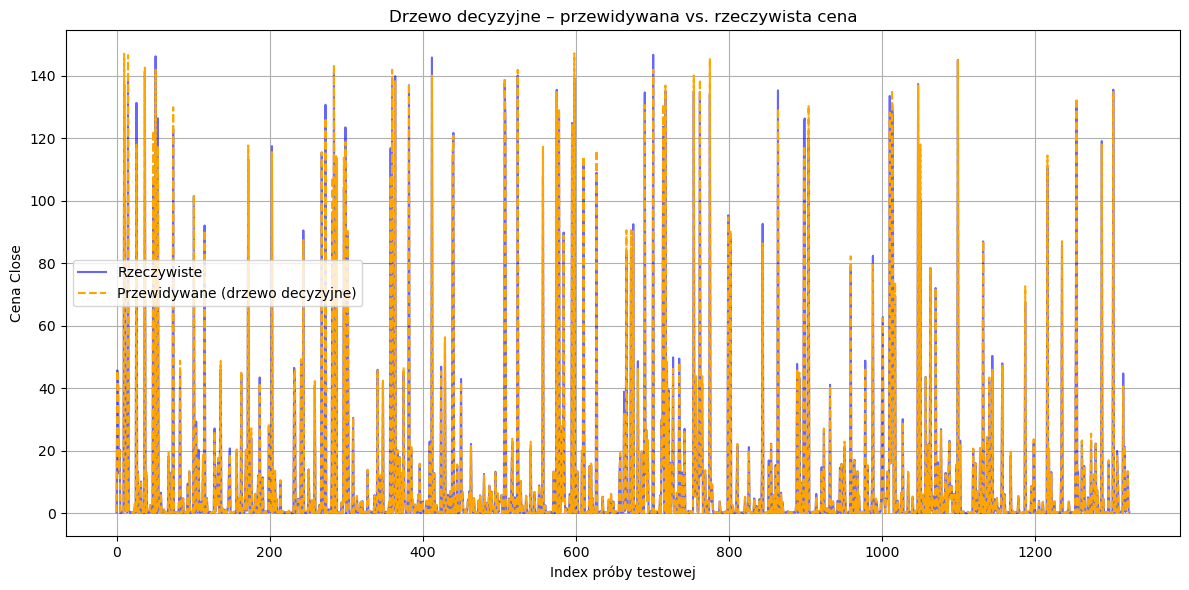

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Rzeczywiste', color='blue', alpha=0.6)
plt.plot(y_pred_tree, label='Przewidywane (drzewo decyzyjne)', color='orange', linestyle='--')
plt.title('Drzewo decyzyjne – przewidywana vs. rzeczywista cena')
plt.xlabel('Index próby testowej')
plt.ylabel('Cena Close')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()